In [8]:
import numpy as np 
import pandas as pd 

波士顿房价数据集字段说明
* CRIM    房屋所在镇的犯罪率
* INDUS   面积大于25000平方英尺住宅所占比例
* CHAS    房屋是否位于河边，如果在河边值为1，否则，值为0
* NOX     一氧化氮浓度
* RM     平均房间数量
* AGE     1940年前建成房屋所占比例
* DIS     房屋距离波士顿5大就业中心的加权距离
* RAD     距离房屋最近的公路
* TAX     财产税额度
* PTRATIO   房屋所在镇师生比例
* BLACK    计算公式：1000*(房屋所在镇非美籍人口所在比例-0.63) ** 2
* LSTAT    弱势群体人口所占比例
* MEDV     房屋的平均价格

In [24]:
data = pd.read_csv(r"boston.csv")
#data
#查看数据的基本信息，同时，也可以查看各个特征列是否存在缺失值
#data.info()
#查看是否存在重复列
data.duplicated().any()
data.info()
data.drop("Unnamed: 0",axis=1,inplace=True)#删除第一列的方法，或者在pd.read_csv中添加一段,index_col=0这个也行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


最小二乘公式
W = (X^T^ * X)^-1^ * X^T^ * y

In [25]:
class LinearRegression:
    '''使用python实现的线性回归。(最小二乘法)'''
    def fit(self,X,y):
        '''根据提供的训练数据X,对模型进行训练。
        Parameters 
        ----
        X: 类数组类型。形状：[样本数量，特征数量]
           特征矩阵， 用来对模型进行训练 
           
        y：类数组类型 形状：[样本的数量]
        '''
        X = np.asmatrix(X)#将X转换为矩阵的形式,X必须是完整的数组
        #说明：如果X是数组对象的一部分，而不是完整的对象数据，(例如：X是由其他对象通过切片传递过来的)
        #这个时候就必须使用copy了，在副本上完成矩阵的转换
        X = np.asmatrix(X.copy())
        #y是一个一维结构，可以不用进行拷贝
        #注意，要把y变成2维的形式通过reshape的方法进行转换
        y = np.asmatrix(y).reshape(-1,1)#前面是行的数量，后面是列的数量，-1是根据当前y的数量进行自动传值
        
        #通过最小二乘公式求解出最佳的权重值,矩阵相乘直接用*也行，self.w_是权重
        self.w_ = (X.T*X).I*X.T*y#.I是矩阵的逆
        
    def predict(self,X):
        '''
        根据参数传递的样本X,对样本数据进行预测。
        Parameters 
        ----
        X: 类数组类型。形状：[样本数量，特征数量]
           特征矩阵， 待预测的样本特征(属性)
        Returns
        ---- 
        result:数组类型
        预测结果 
        '''
        #将X转换成矩阵，注意，需要对X进行拷贝
        X = np.asmatrix(X.copy())
        result = X*self.w_
        result = np.asarray(result).ravel()#使用ravel可将数组进行扁平化处理
        return result

In [26]:
#不考虑截距的情况
t = data.sample(len(data),random_state=0)#随机这个数组
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400:,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr =  LinearRegression()
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean(np.sqrt((result-test_y)**2)))
#查看模型的权重值
display(lr.w_)

3.1900584773821854

matrix([[-9.32859692e-02],
        [ 4.39664692e-02],
        [ 5.72354432e-03],
        [ 2.41509608e+00],
        [-3.31988921e+00],
        [ 5.59119871e+00],
        [-2.18905524e-03],
        [-8.57221736e-01],
        [ 2.28120616e-01],
        [-1.18896061e-02],
        [-2.52710238e-01],
        [ 1.49077626e-02],
        [-4.56116634e-01]])

In [31]:
#考虑截距的情况，需要在数据前多增加一列1的数据作为x0
t = data.sample(len(data),random_state=0)
#t["Intcept"]=1#增加一列，但是是在最后面添加的，所以不采用
#按习惯截距作为w0，我们为之配上一个x0，x0列放在最前面。
#返回的是t的列，然后直接insert就行了
new_columns = t.columns.insert(0,"Intercept")
t = t.reindex(columns=new_columns,fill_value=1)#更新列信息
#t["Intercept"]=1#给新列指定一个值，或者直接在reindex里面进行操作

train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400:,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]

lr =  LinearRegression()
lr.fit(train_X,train_y)
result2 = lr.predict(test_X)
display(np.mean(np.sqrt((result2-test_y)**2)))
#查看模型的权重值
display(lr.w_)

3.066756710605814

matrix([[ 4.00542166e+01],
        [-1.10490198e-01],
        [ 4.11074548e-02],
        [ 1.14986147e-02],
        [ 2.03209693e+00],
        [-1.95402764e+01],
        [ 3.28900304e+00],
        [ 6.91671720e-03],
        [-1.39738261e+00],
        [ 3.78327573e-01],
        [-1.54938397e-02],
        [-8.64470498e-01],
        [ 8.29999966e-03],
        [-5.66991979e-01]])

array([35.34289976, 32.56027605,  8.41605682, 10.76441775, 22.40510667,
       34.57839997, 18.85010693, 19.04819727, 15.31591499, 26.19380603,
       39.70116608, 25.57272795, 41.19683392, 25.14857116, 22.62271262,
       10.65210461, 12.54433824, 14.95320115, 18.93790499,  3.65468619,
       27.5931246 , 26.43144254, 39.52724121, 20.63112118, 21.66926471,
       34.30662795, 33.10570745, 10.15893122, 25.38756046, 41.81840499,
       17.23104577, 18.50719176, 25.64386143, 18.75253276,  6.55388358,
       20.43057918, 34.56291524, 16.59186994, 23.30059919, 14.45158113,
       24.49108561, 19.61531561, 17.77832727, 18.36301736, 33.49931946,
       19.90505698, 31.63525954, 34.18624669, 39.77711706, 17.58135063,
       17.41802409, 35.90901185, 18.64999369,  8.8650229 , 14.89716369,
       25.18444225, 20.47407629, 17.10572723, 27.58036666, 13.43611287,
        6.27714191, 19.78525035,  7.26815566, 27.08571494,  2.26807905,
       29.44352678, 32.02833063, 22.93015152, 17.47756054, 18.75

In [30]:
#可视化展示
import matplotlib as mpl
from matplotlib import pyplot as plt
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

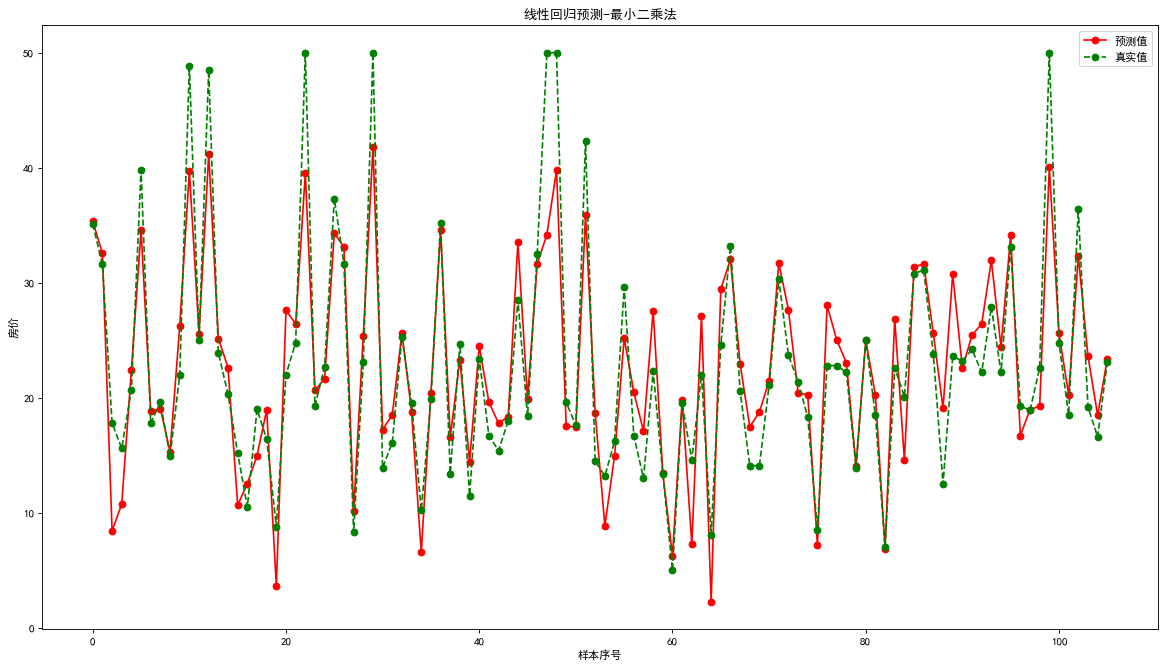

In [32]:
plt.figure(figsize=(18,10),dpi=80)
#绘制预测值
plt.plot(result2,"ro-",label="预测值")
plt.plot(test_y.values,"go--",label="真实值")
plt.title("线性回归预测-最小二乘法")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()